In [1]:
import numpy 

# Add utils folder
import sys
sys.path.append('../utils')

In [2]:
with open('../data/bunny.binvox', 'rb') as f:
    voxel = binvox_rw.read_as_3d_array(f)
voxel, voxel.dims

(<binvox_rw.Voxels at 0x7fe0bc05de70>, [32, 32, 32])

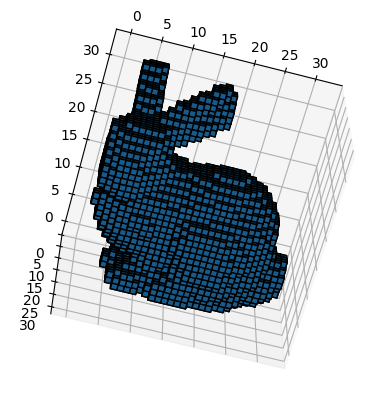

In [3]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
ax.view_init(115, -75)
_ = ax.voxels(voxel.data, edgecolor='k')

In [4]:
voxel.dims, voxel.translate, voxel.scale

([32, 32, 32], [-0.0943804, 0.0333099, -0.0616792], 0.155159)

## Convert voxels into points

In [1]:
import numpy as np
# Add utils folder
import sys
sys.path.append('../utils')

dataset_version = 2

try:
    from nt_prepare_tools_numba import carve_voxels, sample_points_near_surface
except Exception as e:
    print('Failed to run with numba, run via simple python...')
    from nt_prepare_tools import carve_voxels, sample_points_near_surface

with open('../data/bunny_256.binvox', 'rb') as f:
    voxel = binvox_rw.read_as_3d_array(f)
voxel, voxel.data.shape

(<binvox_rw.Voxels at 0x7f73f321c1c0>, (256, 256, 256))

In [2]:
voxel_model_256 = voxel.data
# you need to make absolutely sure that the top direction of your shape is j-positive direction in the voxels,
# otherwise the z-carving code will not work properly. (z-carving ≈ floodfill to make the voxels solid inside)
# you can adjust the direction of your voxels via np.flip and np.transpose.
if dataset_version == 1:
    # add flip&transpose to convert coord from shapenet_v1 to shapenet_v2
    voxel_model_256 = np.flip(
        np.transpose(voxel_model_256, (2, 1, 0) ),
        2,
    )
carve_voxels(voxel_model_256)
sample_voxels, sample_points, sample_values, exceed_flag = sample_points_near_surface(
    voxel_model_256, 32, 16*16*16
)
sample_voxels.shape, sample_points.shape, sample_values.shape

((32, 32, 32, 1), (4096, 3), (4096, 1))

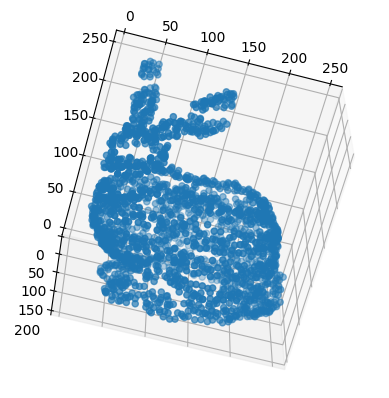

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(115, -75)
ax.scatter(
    sample_points[sample_values[:, 0]==True, 0], 
    sample_points[sample_values[:, 0]==True, 1], 
    sample_points[sample_values[:, 0]==True, 2], 
)

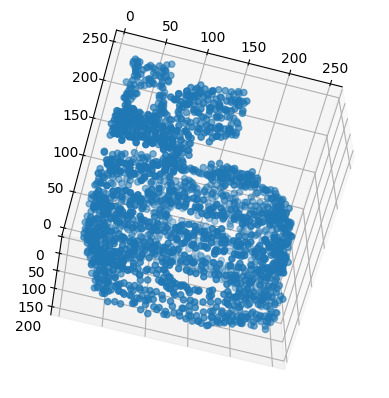

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(115, -75)
ax.scatter(
    sample_points[sample_values[:, 0]==False, 0], 
    sample_points[sample_values[:, 0]==False, 1], 
    sample_points[sample_values[:, 0]==False, 2], 
)